In [10]:
%%capture
%run EOMs.ipynb
from scipy.optimize import fsolve

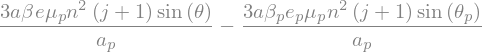

In [11]:
ndot

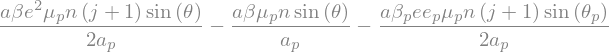

In [12]:
edot

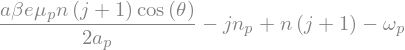

In [13]:
thpdot

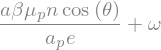

In [14]:
pomdot

In [15]:
Dpom = symbols(r"\Delta\varpi")
Dpom

# Equilibrium values if test particle has $e$ and $a$ damping

In [41]:
ac = symbols("a_c",positive=True)
te = symbols("tau_e",positive=True)
ta = symbols("tau_a",positive=True)

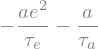

In [42]:
-a/ta-a*e**2/te

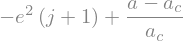

In [43]:
k_expr = (a-ac)/ac - (j+1)*e**2
k_expr

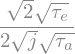

In [56]:
solve(k_expr.diff(a)*(-a/ta-2*a*e**2/te) + k_expr.diff(e)*(-e/te),e)[1].subs(a,ac)

# $\theta_p$ circulating, $\theta$ fixed to non-zero/pi value, $\omega=\omega_p=0$

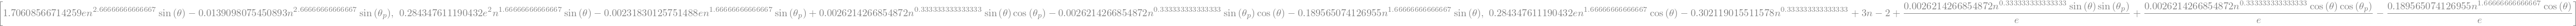

In [22]:
convs = {a: n ** (2.0 / 3), pom: omp * t + thp - th}
params = {
    j: 2,
    mup: 1e-1,
    bp: 1.5455341716765871,
    b: 1.8956507412695471,
    b1_3_2: 12.08476062046314,
    b2_3_2: 10.485706741948807,
    np: 1,
    ap: 1,
    ep: 0.01,
    omp: 0.000,
    om: 0.000,
}

alpha0val = (params[j] / (params[j] + 1)) ** (2.0 / 3)

funs = [
    expand_trig(iterfun.subs(convs).subs(params)).expand()
    for iterfun in [ndot, edot + edsec, (thpdot + omp - pomdot - pomdsec)]
]
funs

Here we assume $\cos\theta_p$ and $\sin\theta_p$ average to zero

In [23]:
funs = [iterfun.subs({cos(thp): 0, sin(thp): 0}) for iterfun in funs]

**I think the problem could be here:** are these linearly independent constraints bc of $\sin(\theta)$ in the first 2?

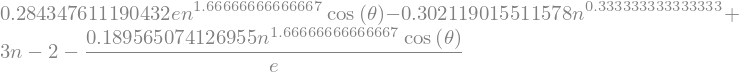

In [24]:
for fun in funs:
    display(fun)

In [25]:
_func = lambdify([n,e,th],funs)
def _f(y):
    return _func(*y)

## Dependence on initial guesses (are there multiple equilibria?)

See above, this is due likely to Eqs not being LI

In [26]:
init_ths = npy.linspace(0,2*npy.pi,100)
eqs_n = []
eqs_e = []
eqs_th = []
for init_th in init_ths:
    eq = fsolve(_f, [0.7, 0.01, init_th],xtol=1e-16)
    eqs_n += [eq[0]]
    eqs_e += [eq[1]]
    eqs_th += [eq[2]]

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in scalar power
  return [1.70608566714259*e*n**2.66666666666667*sin(theta), 0.284347611190432*e**2*n**1.66666666666667*sin(theta) - 0.189565074126955*n**1.66666666666667*sin(theta), 0.284347611190432*e*n**1.66666666666667*cos(theta) - 0.302119015511578*n**0.333333333333333 + 3*n - 2 - 0.189565074126955*n**1.66666666666667*cos(theta)/e]
/Users/jtlaune/micromamba/envs/Science/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/jtlaune/micromamba/envs/Science/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)


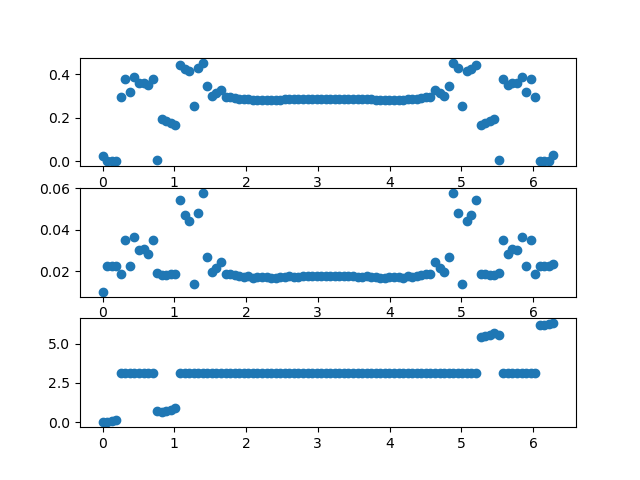

In [27]:
fig, ax= plt.subplots(3)
ax[0].scatter(init_ths,eqs_n)
ax[1].scatter(init_ths,eqs_e)
ax[2].scatter(init_ths,eqs_th)

I think this is a numerical artifact or error, because it depends on the initial guess for $e$, i.e. solutions for $e_0=0.1$ are near $0.1$, and $e_0=0.01$ are near $0.01$. Maybe this is a relic of setting the parameter k or something in the Hamiltonian? I don't know. But if you also look at the equations, $e_p$ disappears in this treatment. Overall I am skeptical that this is a true thing here in this treatment.

But this raises the further question of why i can't find equilibrium here?

Maybe $\cos\theta_p$ and $\sin\theta_p$ don't average to zero?

Others to try:
- $\theta_p-\theta$ locked
- $\theta_p$ locked and $\theta$ circulating

# $\theta_p$ circulating, $\theta-\theta_p$ circulating, $\theta$ fixed

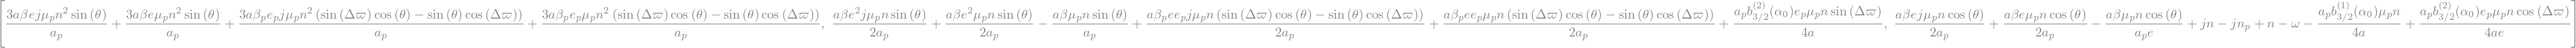

In [28]:
convs = {pom: omp * t + thp - th}
params = {
}

alpha0val = (j / (j + 1)) ** Rational(2 , 3)

funs = [
    expand_trig(iterfun.subs(convs).subs(params).expand().subs({thp: th-Dpom}))
    for iterfun in [ndot, edot + edsec, thpdot + omp - pomdot - pomdsec]
]
funs

In [29]:
funs = [iterfun.subs({cos(thp): 0, sin(thp): 0, sin(Dpom):0,cos(Dpom):0}) for iterfun in funs]

Assume $\mu_p e \ll \mu_p/e$

In [30]:
omsec = symbols(r"\omega_{\rm\ sec}")
omsec

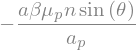

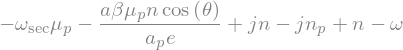

In [31]:
for fun in funs:
    display(fun.subs(mup*e,0).collect(mup*n*b*cos(th)).collect(a*e/2/ap).subs(ap*b1_3_2*n/4/a, omsec))

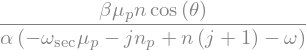

In [32]:
solve(funs[2].subs(mup*e,0).collect(mup*n*b*cos(th)).collect(a*e/2/ap).subs(ap*b1_3_2*n/4/a, omsec),e)[0].subs(ap,alpha*a).subs(j*n, (j+1)*n-n)

This can have a singularity even when $\omega=0$... does $\omega\neq 0$ add anything here?
- The average distance $\delta n/n$ is like $\mu_p^{2/3}$.. Is this anything?
- If theres SMA and eccentricity damping on the test particle then $(j+1)n-jn_p\sim 0$ to $\sim \tau_e/\tau_a\propto h^2$.

# $\theta_p$ circulating, $\theta-\theta_p$ fixed to non-zero/pi value

Noticing now that $\theta$ must average out in this case. Fix in paper.

**Need to make sure functions are correct in each of these sections!!!**

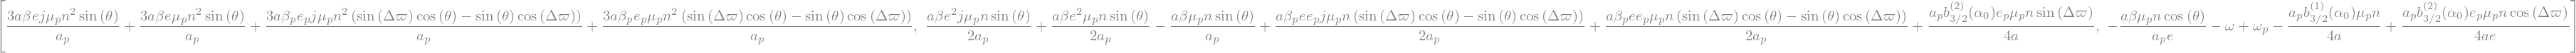

In [33]:
convs = {pom: omp * t + thp - th}
params = {
    #j: 2,
    #mup: 1e-1,
    #bp: 1.5455341716765871,
    #b: 1.8956507412695471,
    #b1_3_2: 12.08476062046314,
    #b2_3_2: 10.485706741948807,
    #np: 1,
    #ap: 1,
    #ep: 0.01,
    #omp: 0.00,
    #om: 0.000,
}

#alpha0val = (params[j] / (params[j] + 1)) ** (2.0 / 3)
alpha0val = (j / (j + 1)) ** Rational(2 , 3)

funs = [
    expand_trig(iterfun.subs(convs).subs(params).expand().subs({thp: th-Dpom}))
    for iterfun in [ndot, edot + edsec, (omp - pomdot - pomdsec)]
]
funs

Here we assume $\cos\theta_p$ and $\sin\theta_p$ average to zero and $\theta=\pi$

In [34]:
funs = [iterfun.subs({cos(thp): 0, sin(thp): 0}) for iterfun in funs]

In [35]:
fun.simpli

AttributeError: 'Add' object has no attribute 'simpli'

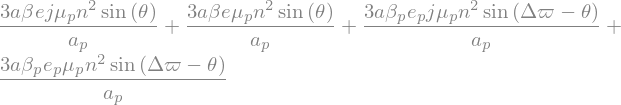

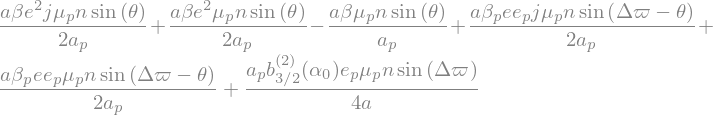

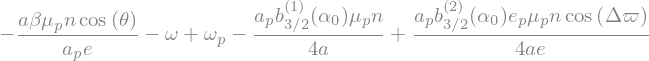

In [ ]:
for fun in funs:
    display(trigsimp(fun).expand())

Then $\Delta\varpi=0,\pi$

And get one equation, 2 unknowns. For now $n$ is a free parameter?

So for now try $n\simeq j/j+1)$? and set $\omega=0$ quick & dirty

In [ ]:
Dom = symbols(r"\Delta\omega_{\rm\ ext}")
Dom

$\Delta\varpi=0$ numerically corresponds to capture

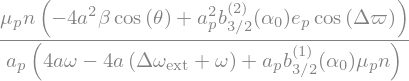

In [ ]:
#_expr = solve(funs[2].subs({n:params[j]/(params[j]+1)}),e)[0].simplify()
_expr = solve(funs[2],e)[0].simplify()
__ = (_expr.subs({omp:Dom+om}))#.subs({Dpom:pi})
#_f = lambdify([ep,Dom],__.subs({mup:5e-5}))
__

In [ ]:
(3/2)**(2/3)

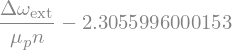

In [ ]:
scale = -4*ap*a*mup*n
_subs1 = {
    ap:alpha*a,
    bp: 1.5455341716765871,
    b: 1.8956507412695471,
    b1_3_2: 12.08476062046314,
    b2_3_2: 10.485706741948807,
    #n:j/(j+1)
}
_subs2 = {
    j:2,
    alpha:(2/3)**(2/3)
}
display((numer(__)/scale).expand().subs(_subs1).subs(_subs2))
display((denom(__)/scale).expand().subs(_subs1).subs(_subs2))

In [ ]:

display(solve((denom(__)/scale).expand().subs(_subs1).subs(_subs2),Dom)[0]*(2/3*np/n))

In [ ]:
solve(Eq(0.75,0.964/(2.639-Dom/5e-5)),Dom)

In [ ]:
solve(0.964-2.29*ep,ep)

In [ ]:
solve(numer(__),ep)

In [ ]:

solve(denom(__),Dom)

I think this is something. Maybe this combined with the $\Phi$ constraint on capture, $e_p\approx\mu_p^{1/3}$?

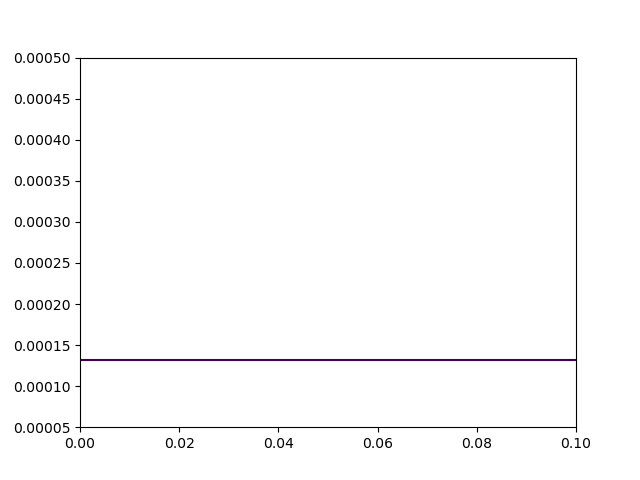

In [ ]:
plt.clf()
x, y = npy.meshgrid(npy.linspace(0,0.1,1000),npy.linspace(0.00005,0.0005,1000))
plt.contour(x, y, _f(x,y),levels=[0])
plt.show()

In [ ]:
numer(_expr)

In [ ]:
denom(_expr)/5e13

In [ ]:
_func = lambdify(funs[2].subs({n:params[j]/(params[j]+1)}))
def _f(y):
    return()

TypeError: lambdify() missing 1 required positional argument: 'expr'